In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\06.Data Science Weekday Batch - 11Oct'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_heart = pd.read_excel('heart_v2.xlsx')

In [5]:
df_heart

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
df_heart.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [8]:
df_heart.isna().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

### Create features and target variable from the dataset

In [9]:
X = df_heart.drop('heart disease', axis=1) #input variables / features

In [10]:
X

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [11]:
y = df_heart['heart disease'] #target variable

### Plot the  correlation matrix
`hint: .corr()`

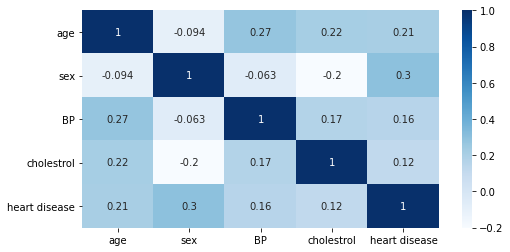

In [12]:
plt.subplots(figsize=(8,4))

sns.heatmap(df_heart.corr(), annot = True, cmap = 'Blues')

plt.show()

### Plot the count of heart disease patients by `gender` , `age`, & `cholestrol` - one at a time

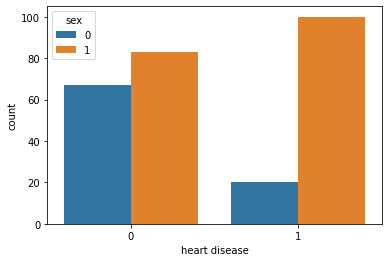

In [15]:
sns.countplot(x = 'heart disease', hue = 'sex', data = df_heart)
plt.show()

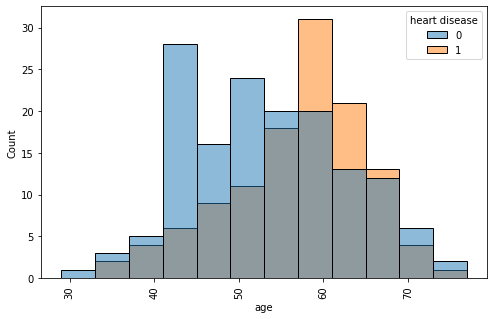

In [14]:
plt.subplots(figsize = (8,5))
sns.histplot(x = 'age', hue = 'heart disease', data = df_heart)
plt.xticks(rotation = 90)
plt.show()


### Creating train-test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [19]:
X_train.shape, X_test.shape

((216, 4), (54, 4))

### Fit the RF model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

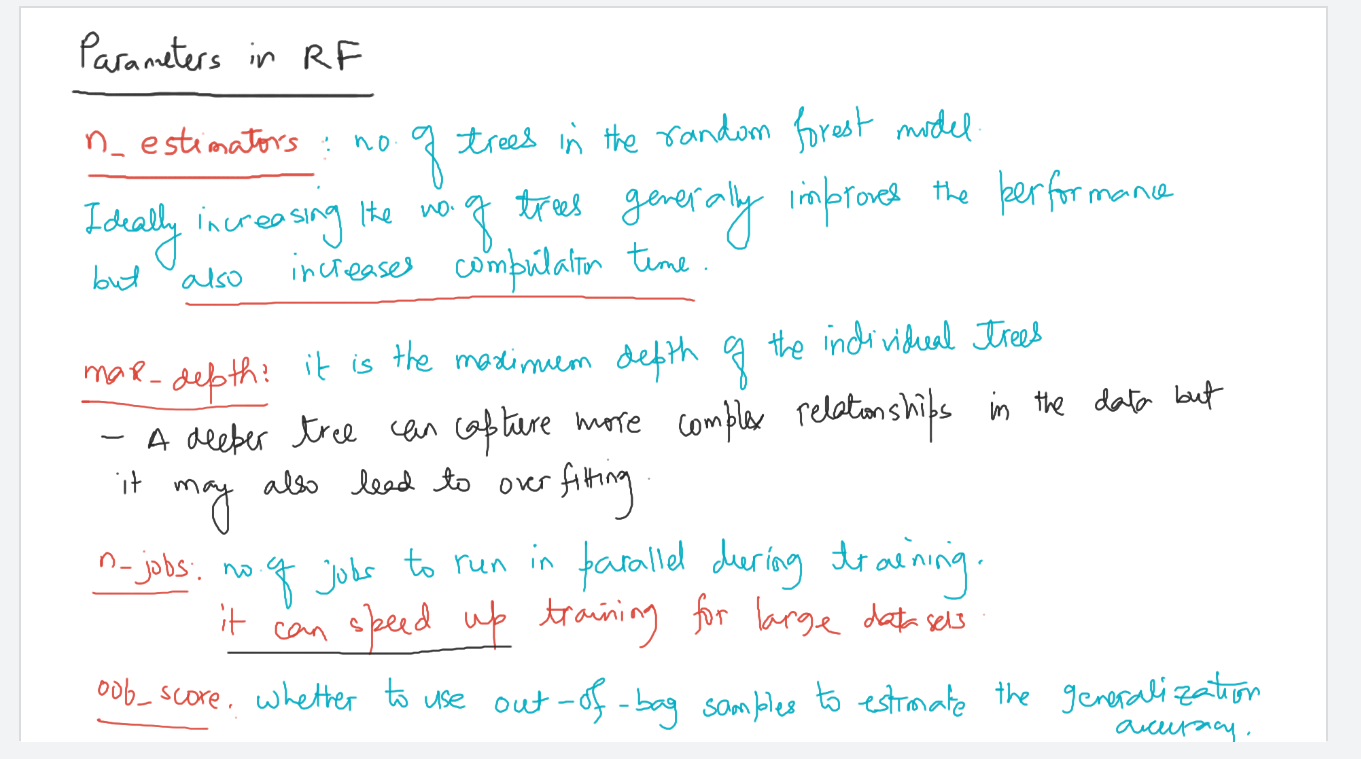

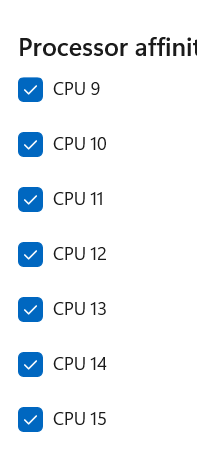

In [22]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [24]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 190 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [25]:
### Checking oob_score
classifier_rf.oob_score_

0.6712962962962963

### Hyperparameter tuning for Random Forest using GridSearchCV 

In [26]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [27]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
### Initiate the grid search model
grid_search=GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

- estimator = rf -> specifies the estimator (model) to be used in the grid search. In our case, rf is the model to be used

- param_grid = params --> it takes a dictionary where keys are hyperparameter names and values are lists of values to try for each hyperparameter

- cv=4 -> specifies the number of cross-validation folds to be used in the grid search. In this case, cv=4 means 4-fold cross valdiation is employed

- verbose=1 --> it provides the progress information during the search

- scoring=accuracy --> it specifies the metric used to evaluate the performance of the model for each combination of hyperparameters

In [30]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 18 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [31]:
grid_search.best_score_

0.7037037037037037

In [33]:
rf_best = grid_search.best_estimator_

In [34]:
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=30,
                       n_jobs=-1, random_state=42)

### Visualize

In [43]:
from sklearn.tree import plot_tree

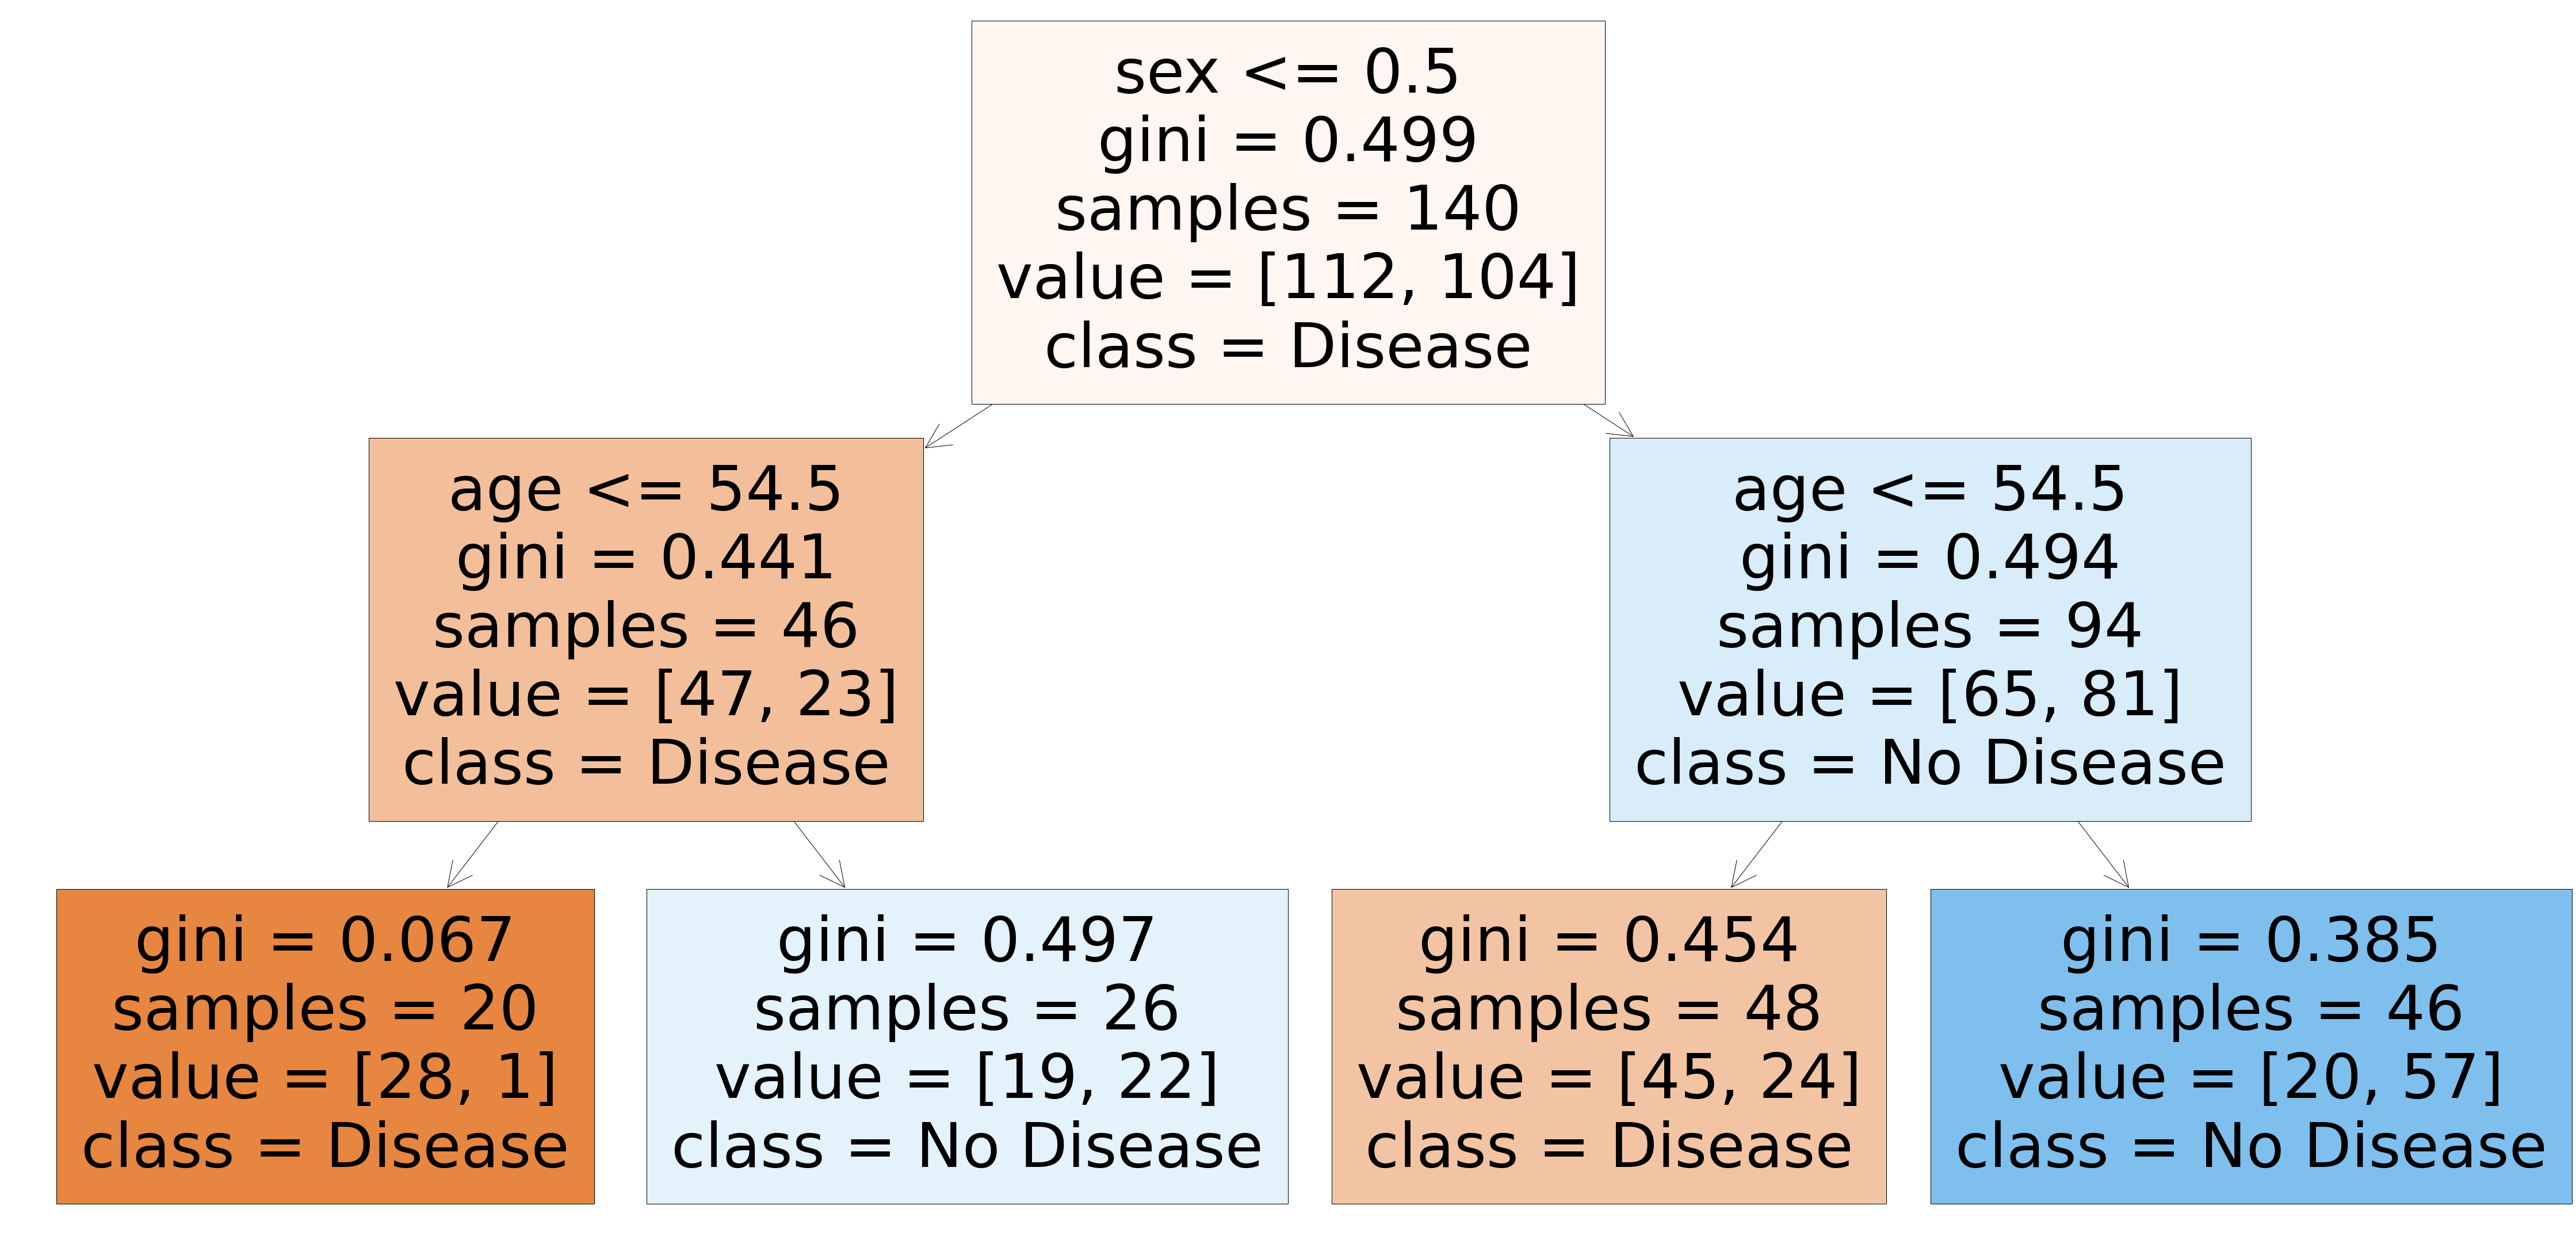

In [54]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[15], feature_names=X.columns, class_names=['Disease', 'No Disease'], filled='True')
plt.show()

## Sort the data with variable importance

In [58]:
 rf_best.feature_importances_

array([0.25194499, 0.38888837, 0.2222974 , 0.13686925])

In [55]:
var_importance_df = pd.DataFrame(
{'Varname': X_train.columns,
'Importance': rf_best.feature_importances_})

In [56]:
var_importance_df

,Varname,Importance
0,age,0.251945
1,sex,0.388888
2,BP,0.222297
3,cholestrol,0.136869


In [57]:
var_importance_df.sort_values(by='Importance', ascending=False)

,Varname,Importance
1,sex,0.388888
0,age,0.251945
2,BP,0.222297
3,cholestrol,0.136869


In [59]:
var_importance_df['Importance'].sum()

1.0